### General information of the dataset
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import floor

# We define the dataframe
df = pd.read_csv('Student Depression Dataset.csv')

""" Since the dataset is based on students, the records with values in the columns 'Job Satisfaction' 
 and 'Work Pressure' are very few. To improve clarity in the dataset, these columns are dropped. """
df = df.drop(['Job Satisfaction', 'Work Pressure'], axis=1)

# We create a dataframe with only the individuals who have depression.
df_depre = df[df['Depression'] == 1]

In [2]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
df.describe()

,id,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,7.656104,2.943837,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,1.470707,1.361148,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,6.290000,2.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,8.920000,4.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,10.000000,5.000000,12.000000,5.000000,1.000000


In [ ]:
# We search for null values and delete them
print(list(df.isnull().sum()))
# Only 3 null values in the dataset
df = df.dropna()
print(list(df.isnull().sum()))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Size of the dataset
---

In [14]:
# Define variables
count_people = len(df)
count_dep_people = len(df_depre)

# Display responses
print(f'Number of people in the dataset: \t\t\t{count_people}') # How many people are in the dataset?
print(f'Number of people with depression in the dataset: \t{count_dep_people}') # How many people with depression are in the dataset?
print(f'% of people who are depressed in the dataset: \t\t{round(count_dep_people / count_people * 100, 2)}%') # % of people with depression in the dataset?

Number of people in the dataset: 			27898
Number of people with depression in the dataset: 	16336
% of people who are depressed in the dataset: 		58.56%


### Depression distribution by gender
---

Number of women with depression: 	7221
Number of men with depression: 		9115
% of women who are depressed: 		25.88%
% of men who are depressed: 		32.67%


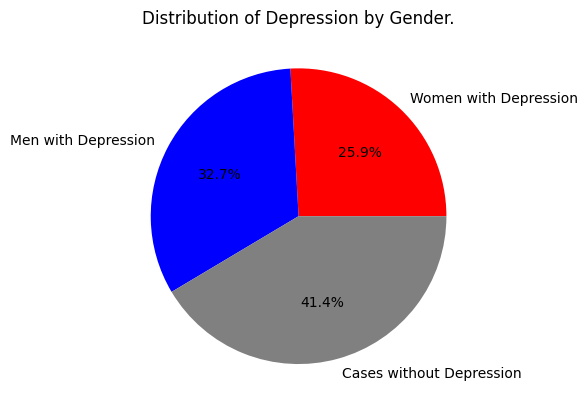

In [16]:
# Define variables
female_dep_count = df_depre['Gender'].value_counts().get('Female')
male_dep_count = df_depre['Gender'].value_counts().get('Male')
percent_of_dep_females = female_dep_count / count_people
percent_of_dep_males = male_dep_count / count_people

# Display responses
print(f'Number of women with depression: \t{female_dep_count}') # How many women have depression?
print(f'Number of men with depression: \t\t{male_dep_count}') # How many men have depression?
print(f'% of women who are depressed: \t\t{round(percent_of_dep_females * 100, 2)}%') # What percentage of women have depression?
print(f'% of men who are depressed: \t\t{round(percent_of_dep_males * 100, 2)}%') # What percentage of men have depression?

# Representation
fig, ax = plt.subplots()
ax.set_title('Distribution of Depression by Gender.')
ax.pie([percent_of_dep_females * 100, percent_of_dep_males * 100, (1 - percent_of_dep_males - percent_of_dep_females) * 100],
        labels=['Women with Depression', 'Men with Depression', 'Cases without Depression'],  
        autopct='%1.1f%%',
        colors=['red', 'blue', 'gray']);


### Depression distribution by age
---

The age range with the most depression cases is [20, 21, 22, 23, 24] with a total of 9025 cases in the dataset.
This represents 32.35% of the cases in the dataset and 55.25% of the cases with depression.

The age with the most associated depression cases is 24 with a total of 2258 cases in the dataset.
This represents 8.09% of the cases in the dataset and 13.82% of the cases with depression.


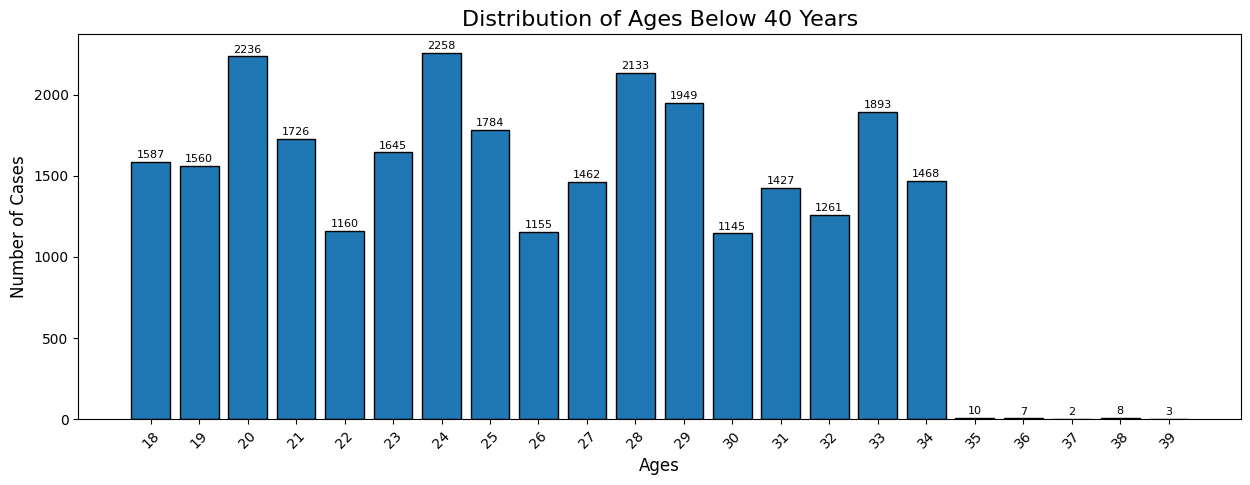

In [17]:
# Define variables
float_unique_ages: list = df['Age'].unique()
unique_ages: dict = {}
for age in float_unique_ages: unique_ages[int(age)] = 0
for age in df['Age']: 
    if int(age) in unique_ages: unique_ages[int(age)] += 1

max_age_key = max(unique_ages, key=unique_ages.get)
max_age_value = unique_ages[24]

age_range = []
cases_in_range = 0
keys = sorted(unique_ages.keys())
for x in range(len(unique_ages) - 4):
    actual_range = [keys[x], keys[x+1], keys[x+2], keys[x+3], keys[x+4]]
    sum_range = 0
    for age in actual_range:
        sum_range += unique_ages[age] 
    if sum_range > cases_in_range:
        age_range = actual_range
        cases_in_range = sum_range

# Display responses
print(f'The age range with the most depression cases is {age_range} with a total of {cases_in_range} cases in the dataset.')
print(f'This represents {round(cases_in_range / count_people * 100, 2)}% of the cases in the dataset and {round(cases_in_range / count_dep_people * 100, 2)}% of the cases with depression.', end='\n\n')
print(f'The age with the most associated depression cases is {max_age_key} with a total of {max_age_value} cases in the dataset.')
print(f'This represents {round(max_age_value / count_people * 100, 2)}% of the cases in the dataset and {round(max_age_value / count_dep_people * 100, 2)}% of the cases with depression.')

# Representation: only data for ages under 40 is shown, as the number of cases above this threshold is minimal (cases < 50)
filtered_ages = {age: count for age, count in unique_ages.items() if age < 40}
plt.figure(figsize=(15, 5))
plt.bar(filtered_ages.keys(), filtered_ages.values(), align='center', width=0.8, edgecolor='black')
plt.xticks(ticks=list(filtered_ages.keys()), rotation=45)
plt.title('Distribution of Ages Below 40 Years', fontsize=16)
plt.xlabel('Ages', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
for x, y in zip(filtered_ages.keys(), filtered_ages.values()):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=8)

plt.show()

### Academic and financial stress
---

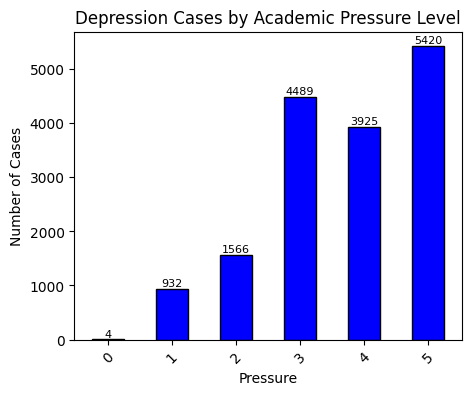

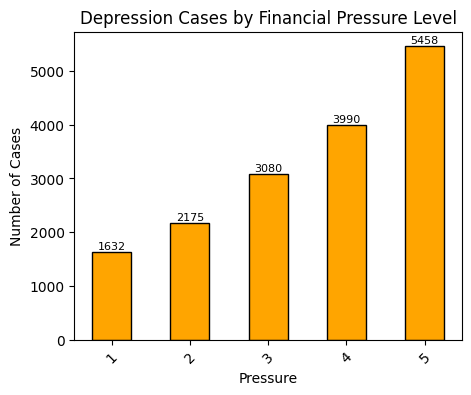

In [18]:
# Define variables
unique_academic_pressure_values = df_depre['Academic Pressure'].unique()
unique_financial_pressure_values = df_depre['Financial Stress'].unique()

academic_stress_dict: dict = {}
financial_stress_dict: dict = {}

for uapv in sorted(unique_academic_pressure_values): academic_stress_dict[int(uapv)] = 0
for ufpv in sorted(unique_financial_pressure_values): 
    if ufpv in [5.0, 4.0, 3.0, 2.0, 1.0, 0.0]:
        financial_stress_dict[int(ufpv)] = 0

for value in df_depre['Academic Pressure']:
    if value in academic_stress_dict: academic_stress_dict[value] += 1
for value in df_depre['Financial Stress']:
    if value in financial_stress_dict: financial_stress_dict[value] += 1

# Representation
plt.figure(figsize=(5, 4))
plt.bar(academic_stress_dict.keys(), academic_stress_dict.values(), align='center', width=0.5, color='blue', edgecolor='black')
plt.xticks(ticks=list(academic_stress_dict.keys()), rotation=45)
plt.title('Depression Cases by Academic Pressure Level', fontsize=12)
plt.xlabel('Pressure', fontsize=10)
plt.ylabel('Number of Cases', fontsize=10)
for x, y in zip(academic_stress_dict.keys(), academic_stress_dict.values()):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=8)
plt.show()

plt.figure(figsize=(5, 4))
plt.bar(financial_stress_dict.keys(), financial_stress_dict.values(), align='center', width=0.5, color='orange', edgecolor='black')
plt.xticks(ticks=list(financial_stress_dict.keys()), rotation=45)
plt.title('Depression Cases by Financial Pressure Level', fontsize=12)
plt.xlabel('Pressure', fontsize=10)
plt.ylabel('Number of Cases', fontsize=10)
for x, y in zip(financial_stress_dict.keys(), financial_stress_dict.values()):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=8)
plt.show()

### Academic results and satisfaction.
---

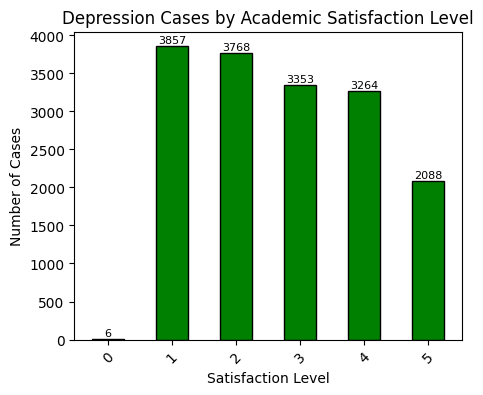

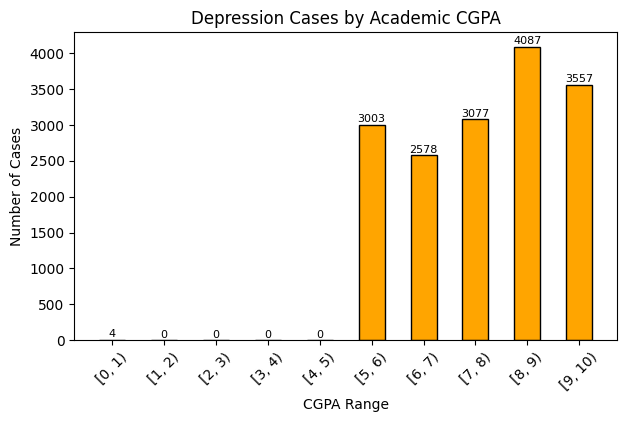

In [19]:
# Define variables
unique_satisfaction_values = df_depre['Study Satisfaction'].unique()
satisfaction_dict: dict = {}
for satisfaction in sorted(unique_satisfaction_values): satisfaction_dict[int(satisfaction)] = 0

for value in df_depre['Study Satisfaction']:
    if value in academic_stress_dict: satisfaction_dict[value] += 1

cgpa_dict = {}
for x in range(10):
    cgpa_dict[f'[{x}, {x+1})'] = 0

for val in df_depre['CGPA']:
    index = floor(val)
    key = f'[{index}, {index+1})'
    if key in cgpa_dict:
        cgpa_dict[key] += 1

# Representation
plt.figure(figsize=(5, 4))
plt.bar(satisfaction_dict.keys(), satisfaction_dict.values(), align='center', width=0.5, color='green', edgecolor='black')
plt.xticks(ticks=list(satisfaction_dict.keys()), rotation=45)
plt.title('Depression Cases by Academic Satisfaction Level', fontsize=12)
plt.xlabel('Satisfaction Level', fontsize=10)
plt.ylabel('Number of Cases', fontsize=10)
for x, y in zip(satisfaction_dict.keys(), satisfaction_dict.values()):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=8)
plt.show()

plt.figure(figsize=(7, 4))
plt.bar(cgpa_dict.keys(), cgpa_dict.values(), align='center', width=0.5, color='orange', edgecolor='black')
plt.xticks(ticks=list(cgpa_dict.keys()), rotation=45)
plt.title('Depression Cases by Academic CGPA', fontsize=12)
plt.xlabel('CGPA Range', fontsize=10)
plt.ylabel('Number of Cases', fontsize=10)
for x, y in zip(cgpa_dict.keys(), cgpa_dict.values()):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=8)
plt.show()

### Sleep and dietary habits.
---

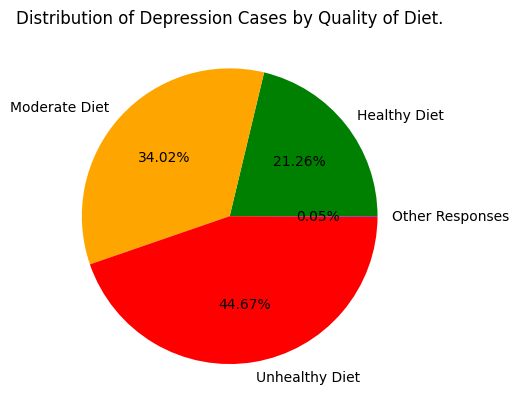

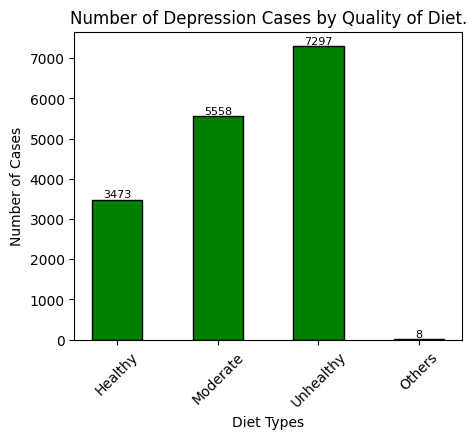

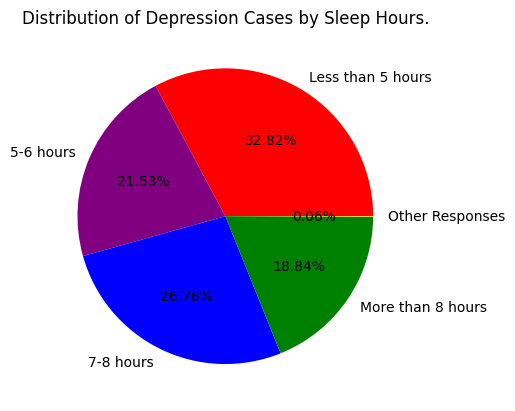

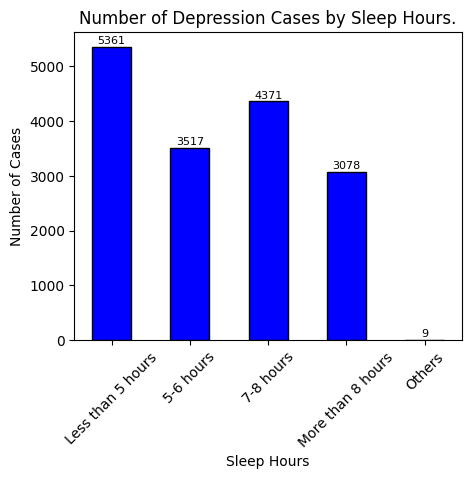

In [20]:
# Define our variables
diet_dict: dict = {}
sleep_dict: dict = {}

unique_diet = df['Dietary Habits'].unique()
unique_sleep = df['Sleep Duration'].unique()
unique_sleep[0], unique_sleep[1] = unique_sleep[1], unique_sleep[0] # Adjusting the order of hours

# Define the keys for the dictionaries
for unique_val in unique_diet: diet_dict[unique_val] = 0
for unique_val in unique_sleep: sleep_dict[unique_val] = 0

# Count the cases by key
for diet in df_depre['Dietary Habits']: diet_dict[diet] += 1
for sleep in df_depre['Sleep Duration']: sleep_dict[sleep] += 1

# Representation
fig, ax = plt.subplots()
ax.set_title('Distribution of Depression Cases by Quality of Diet.')
ax.pie([diet_dict[unique_diet[0]], diet_dict[unique_diet[1]], diet_dict[unique_diet[2]], diet_dict[unique_diet[3]]],  # ['Healthy' 'Moderate' 'Unhealthy' 'Others']
        labels=['Healthy Diet', 'Moderate Diet', 'Unhealthy Diet', 'Other Responses'],
        autopct='%1.2f%%',
        colors=['green', 'orange', 'red', 'blue']);
plt.show()

plt.figure(figsize=(5, 4))
plt.bar(diet_dict.keys(), diet_dict.values(), align='center', width=0.5, color='green', edgecolor='black')
plt.xticks(ticks=list(diet_dict.keys()), rotation=45)
plt.title('Number of Depression Cases by Quality of Diet.', fontsize=12)
plt.xlabel('Diet Types', fontsize=10)
plt.ylabel('Number of Cases', fontsize=10)
for x, y in zip(diet_dict.keys(), diet_dict.values()):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=8)
plt.show()

fig, ax = plt.subplots()
ax.set_title('Distribution of Depression Cases by Sleep Hours.')
ax.pie([sleep_dict[unique_sleep[0]], sleep_dict[unique_sleep[1]], sleep_dict[unique_sleep[2]], sleep_dict[unique_sleep[3]], sleep_dict[unique_sleep[4]]],
        labels=['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours', 'Other Responses'],
        autopct='%1.2f%%',
        colors=['red', 'purple', 'blue', 'green', 'yellow']);
plt.show()

plt.figure(figsize=(5, 4))
plt.bar(sleep_dict.keys(), sleep_dict.values(), align='center', width=0.5, color='blue', edgecolor='black')
plt.xticks(ticks=list(sleep_dict.keys()), rotation=45)
plt.title('Number of Depression Cases by Sleep Hours.', fontsize=12)
plt.xlabel('Sleep Hours', fontsize=10)
plt.ylabel('Number of Cases', fontsize=10)
for x, y in zip(sleep_dict.keys(), sleep_dict.values()):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=8)
plt.show()

### Other factors
---

Number of cases that have had suicidal thoughts: 13957 out of 16336 total depression cases.


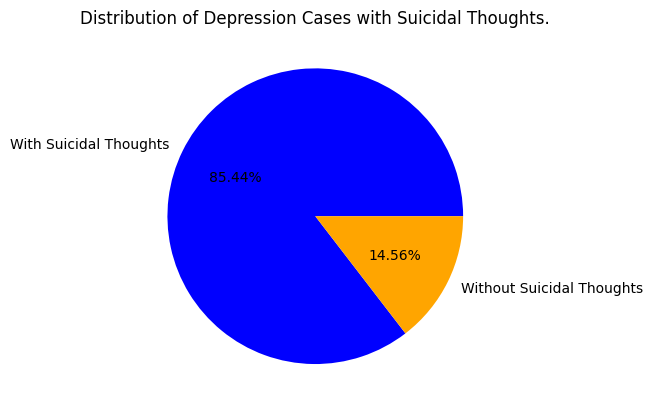

Number of cases with a family history of depression: 8273 out of 16336 total depression cases.


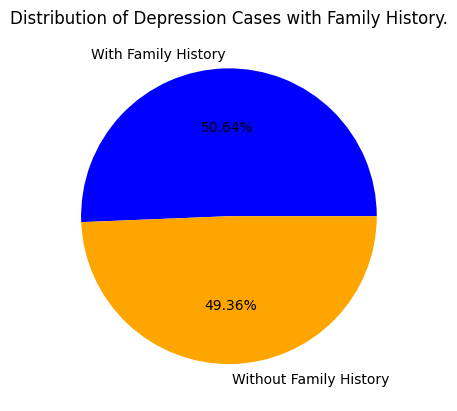

In [21]:
# Define variables
num_suicidal = 0
num_family_history = 0

for val in df_depre['Have you ever had suicidal thoughts ?']:
    if val == 'Yes': num_suicidal += 1
for val in df_depre['Family History of Mental Illness']:
    if val == 'Yes': num_family_history += 1

# Display the results
print(f'Number of cases that have had suicidal thoughts: {num_suicidal} out of {count_dep_people} total depression cases.')

# Representation
fig, ax = plt.subplots()
ax.set_title('Distribution of Depression Cases with Suicidal Thoughts.')
ax.pie([num_suicidal, count_dep_people - num_suicidal],
        labels=['With Suicidal Thoughts', 'Without Suicidal Thoughts'],
        autopct='%1.2f%%',
        colors=['blue', 'orange']);
plt.show()

# Display the results
print(f'Number of cases with a family history of depression: {num_family_history} out of {count_dep_people} total depression cases.')

# Representation
fig, ax = plt.subplots()
ax.set_title('Distribution of Depression Cases with Family History.');
ax.pie([num_family_history, count_dep_people - num_family_history],
        labels=['With Family History', 'Without Family History'],
        autopct='%1.2f%%',
        colors=['blue', 'orange']);
plt.show()

### Correlation of the variables with the Depression column
---

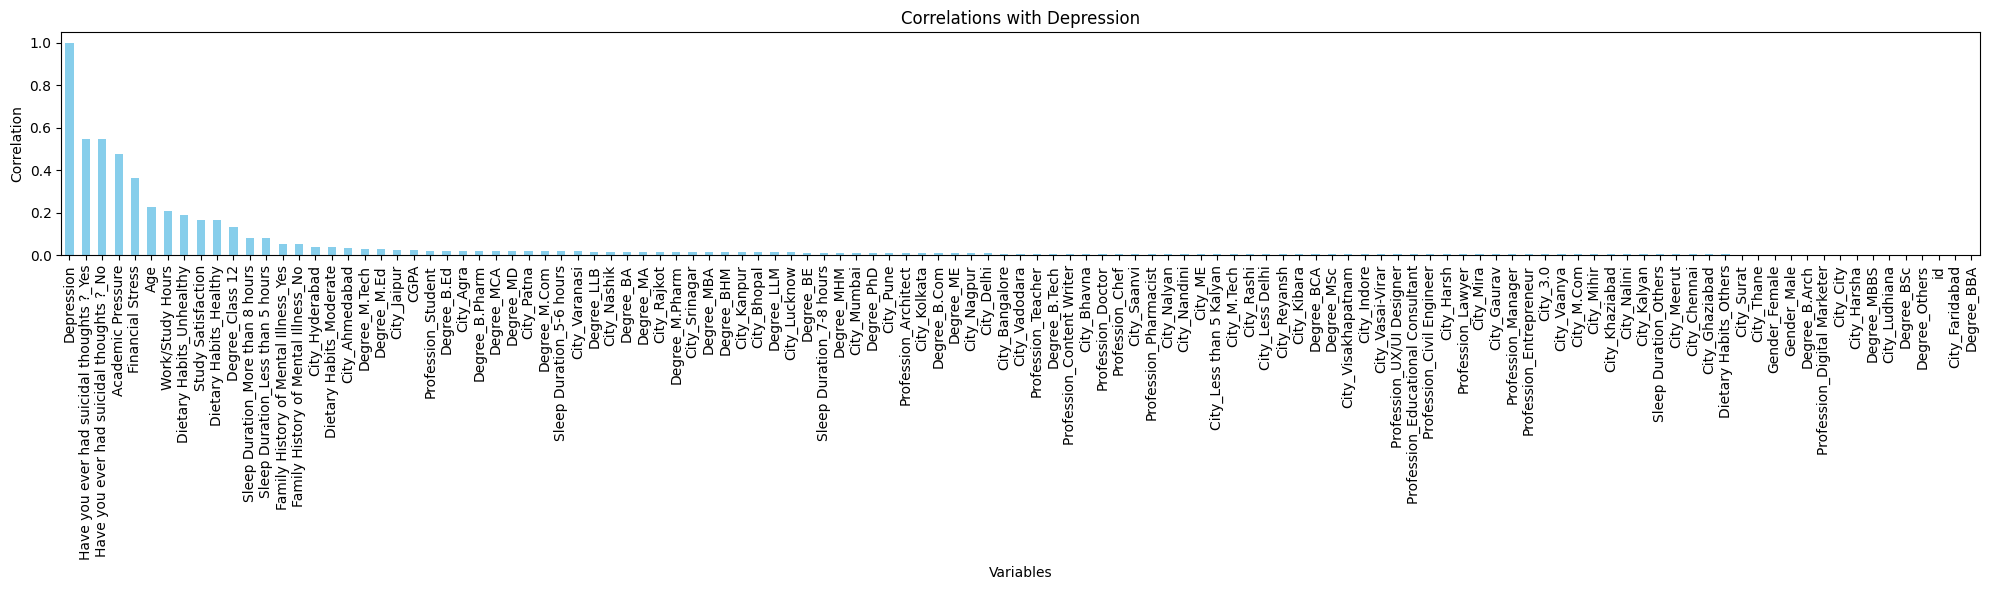

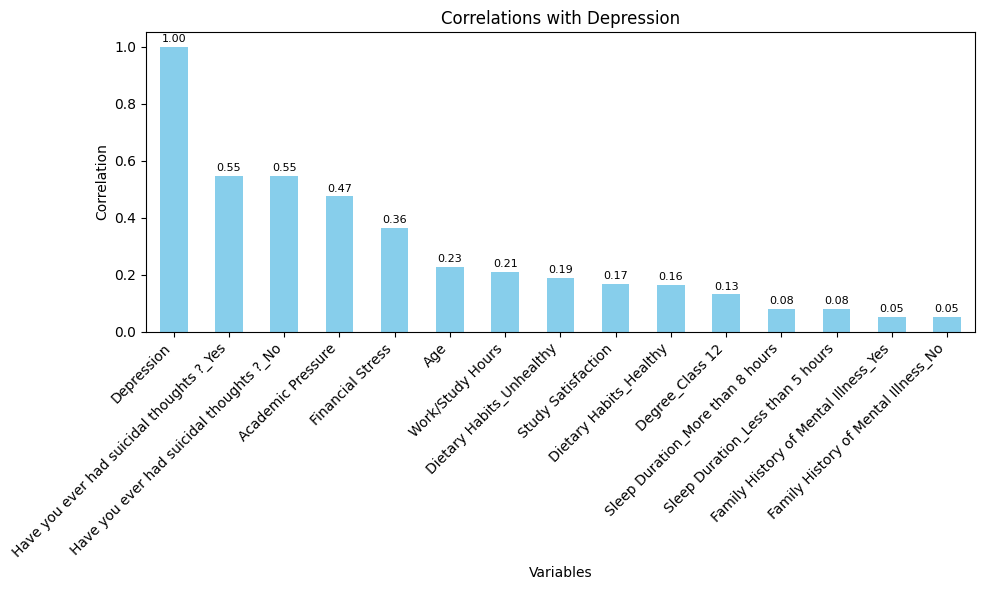

In [22]:
# Calculate correlation and adjustment
df_encoded = pd.get_dummies(df)
corr_matrix = df_encoded.corr()
dep_corr = corr_matrix['Depression']
dep_corr = dep_corr.abs()

# Representation of all values
dep_corr.sort_values(ascending=False).plot(kind='bar', color='skyblue', figsize=(20, 6))
plt.title('Correlations with Depression')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

# Representation of values greater than 5%
dep_corr = dep_corr[dep_corr > 0.05]

dep_corr.sort_values(ascending=False).plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Correlations with Depression')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
for x, y in enumerate(dep_corr.sort_values(ascending=False)):
    plt.text(x, y + 0.01, f'{y:.2f}', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

### Exploration conclusions
---

58.56% of the records in the dataset correspond to individuals experiencing depression.

Men show a higher prevalence of depression in this dataset, with 32.7% compared to 25.9% observed in women.

The age range with the highest risk of depression is 20 to 24 years. Specifically, the age with the highest risk of depression is 24 years.

Analysis of the relationship between academic and financial pressure and depression indicates that both variables are among the most significant predictors for the presence or absence of depression.

Health habits, such as diet and sleep, play a considerable role in the incidence of depression.
Poor diet and sleeping less than 5 hours a day are associated with a higher prevalence of depression in the dataset.

The factor most strongly related to depression is having had suicidal thoughts, with a correlation of 55%. Furthermore, this factor is present in 85.44% of the records for individuals with depression.